In [2]:
%pip install beautifulsoup4
%pip install requests
%pip install pandas
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import requests as req
from bs4 import BeautifulSoup as bs
import csv

response =req.get('https://www.mercadolivre.com.br/ofertas#nav-header')

html = response.text
soup = bs(html, 'html.parser')



tabela = soup.findAll(class_='promotion-item__description')

produtos = []


for item in tabela:
        if item.text > '15% OFF':        
            cells = item.findAll(class_=['andes-money-amount__fraction', 'promotion-item__title',
                                'promotion-item__produtos-text', 'promotion-item__discount-text'])
            if len(cells) >= 4:
                desconto_string = cells[2].text.strip()
                numero_desconto = ''.join(filter(str.isdigit, desconto_string))
            

                desconto_inteiro = int(numero_desconto)
                # print(cells)
                produto={
                    'Nome': cells[3].text.strip(),
                    'Preco original': cells[1].text.strip(),
                    'Desconto': desconto_inteiro,
                    'Valor final': cells[0].text.strip()
                }
                produtos.append(produto)
print(produtos)
                

[{'Nome': 'Motorola Moto G24 128GB Rosa 8GB RAM', 'Preco original': '999', 'Desconto': 25, 'Valor final': '747'}, {'Nome': 'Notebook Samsung Galaxy Book2 I5-1235u Windows 11 Home 8gb 256gb Ssd Grafite', 'Preco original': '4.665', 'Desconto': 37, 'Valor final': '2.899'}, {'Nome': 'Impressora Multifuncional 3 Em 1 Ecotank L3250 Preta Epson Cor Preto Bivolt', 'Preco original': '1.195', 'Desconto': 9, 'Valor final': '1.079'}, {'Nome': "Smart Tv 43'' Android Dolby Aws-tv-43-bl-02-a Aiwa Bivolt", 'Preco original': '1.899', 'Desconto': 24, 'Valor final': '1.439'}, {'Nome': 'Lavadora De Alta Pressão 1500w 1750psi Wap Ousada Plus 2200 110V', 'Preco original': '661', 'Desconto': 26, 'Valor final': '489'}, {'Nome': 'Kit 10 Cuecas Box Boxer Estampadas Masculino Atacado Revenda', 'Preco original': '78', 'Desconto': 50, 'Valor final': '38'}, {'Nome': 'Motorola Moto G04 128GB Grafite 4GB RAM', 'Preco original': '849', 'Desconto': 12, 'Valor final': '739'}, {'Nome': 'Micro-ondas Electrolux 34 Litros M

In [4]:
# Ordenando em ordem alfabética

produtos_ordernados = sorted(produtos, key=lambda x: x['Nome'])

produtos_ordernados

[{'Nome': 'Aspirador Pó E Água 14l 1250w Power Lavor + Bico Extratora',
  'Preco original': '379',
  'Desconto': 21,
  'Valor final': '299'},
 {'Nome': 'Casaco Masculino Jaqueta Puffer Bobojaco Corta Vento Frio Nf',
  'Preco original': '200',
  'Desconto': 36,
  'Valor final': '128'},
 {'Nome': 'Cerveja Heineken Premium Garrafa 6 Long Neck 330ml',
  'Preco original': '42',
  'Desconto': 23,
  'Valor final': '32'},
 {'Nome': 'Coberdrom Casal Queen Size Cobertor Edredom Pele Carneiro',
  'Preco original': '168',
  'Desconto': 14,
  'Valor final': '142'},
 {'Nome': 'Coberdrom Dupla Face Solteiro Sherpa Pele De Carneiro Big',
  'Preco original': '149',
  'Desconto': 13,
  'Valor final': '128'},
 {'Nome': 'Console padrão Ps5 Slim Bundle Ratchet & Clank and Returnal Cor Branco',
  'Preco original': '4.332',
  'Desconto': 14,
  'Valor final': '3.704'},
 {'Nome': 'Cooktop Itatiaia 5 Bocas Essencial Preto - Bivolt 110V/220V',
  'Preco original': '599',
  'Desconto': 33,
  'Valor final': '398'},

In [5]:
# criando um arquivo 

# Nome do arquivo CSV
nome_arquivo = 'a3_euclerio.csv'

# Campos do CSV
campos = ['Nome', 'Preco original', 'Desconto', 'Valor final']

# Escrevendo para o arquivo CSV
with open(nome_arquivo, mode='w', newline='', encoding='utf-8') as arquivo_csv:
    escritor_csv = csv.DictWriter(arquivo_csv, fieldnames=campos)
    escritor_csv.writeheader()
    escritor_csv.writerows(produtos_ordernados)

print(f"Arquivo CSV '{nome_arquivo}' gerado com sucesso!")

Arquivo CSV 'a3_euclerio.csv' gerado com sucesso!


In [6]:
# criando arquivo excel

import pandas as pd
import openpyxl

df = pd.DataFrame(produtos_ordernados)

nome_arquivo_excel = 'a3_euclerio.xlsx'

df.to_excel(nome_arquivo_excel, index=False)

print(f"Arquivo Excel '{nome_arquivo_excel}' gerado com sucesso!")

Arquivo Excel 'a3_euclerio.xlsx' gerado com sucesso!


In [7]:
# Análise de Dados

%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


Dados Estatísticos:
Média dos valores de Desconto é: R$ 26.18
Mediana dos valores de Desconto é: R$ 25.00
Desvio padrão dos valores de Desconto é: R$ 11.14
Variância dos valores de Desconto é: R$ 124.11


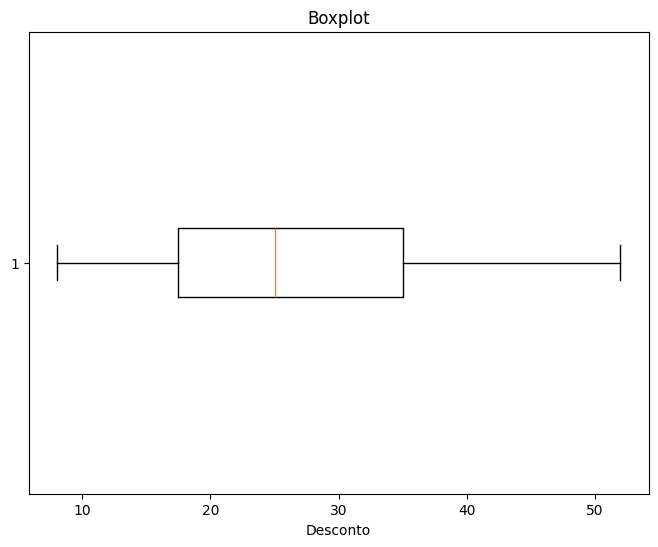

In [8]:
# Análise de Dados
import numpy as np
import matplotlib.pyplot as plt

valores_finais = [float(produto['Desconto']) for produto in produtos_ordernados]

print('Dados Estatísticos:')

# Média dos valores
media = np.mean(valores_finais)
print(f'Média dos valores de Desconto é: R$ {media:.2f}')

# Mediana dos valores
mediana = np.median(valores_finais)
print(f'Mediana dos valores de Desconto é: R$ {mediana:.2f}')

# Desvio padrão dos valores
desvio_padrao = np.std(valores_finais)
print(f'Desvio padrão dos valores de Desconto é: R$ {desvio_padrao:.2f}')

# Variância dos valores
variancia = np.var(valores_finais)
print(f'Variância dos valores de Desconto é: R$ {variancia:.2f}')

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(valores_finais, vert=False)
plt.title('Boxplot')
plt.xlabel('Desconto')
plt.show()